<h1>Script to test Lehmer's congruential algorithm</h1>


<h2>CIE4604: Simulation and Visualisation</h2>
 
Created:  November 2014 by Hans van der Marel<br>
Updated:  November 2019 by Ullas Rajvanshi (converted the script in Python)<br>
Updated:  November 2020 by Hans van der Marel (addional comments and legacy matlab)<br>

<br>
This script uses:<br>
- lehmer&emsp;&emsp;homebrew function for Lehmer's congruential algorithm<br>
- numpy.random.rand&emsp;&emsp;Python random number generator<br>
- matplotlib.pyplot.psd&emsp;&emsp;Computes and plots PSD

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

Use numpy RNG to generate 1000 U(0,1) distributed variables and plot the PSD.

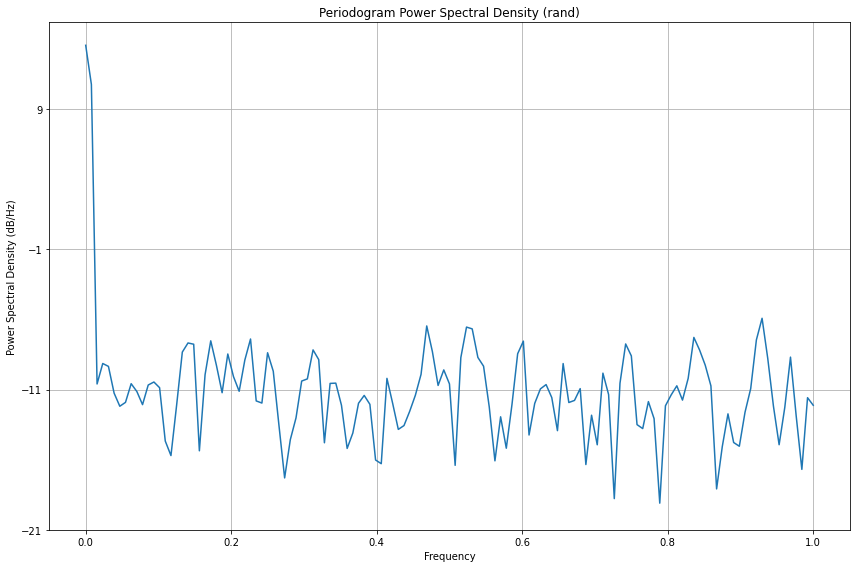

In [2]:
xrand = np.random.rand(1000)
plt.figure(figsize=(12, 8))
plt.psd(xrand)
plt.title('Periodogram Power Spectral Density (rand)')
plt.tight_layout()
plt.show()


Make homebrewed Lehmer function with a simple RNG

In [3]:
def lehmer(n=None, x0=None, a=None, m=None):
    """
    :param n: numbers
    :param x0: using X0 as starting value
    :param a: multiplier A
    :param m: modulus M
    :return: uniformly distributed random numbers

    Examples:

        x=lehmer(1000,1,13,31);         

    (c) Hans van der Marel, 2019

    Created: 1 Novermber 2019 by Hans van der Marel
    """
    x = np.zeros((n))
    x[0] = x0
    for k in range(1, n):
        x[k] = np.mod(a * x[k - 1], m)
    x = x / m
    return x

Call our homebrew function to generate 1000 random numbers, using a=13 and m=31, and 1 as starting value, and plot the PSD

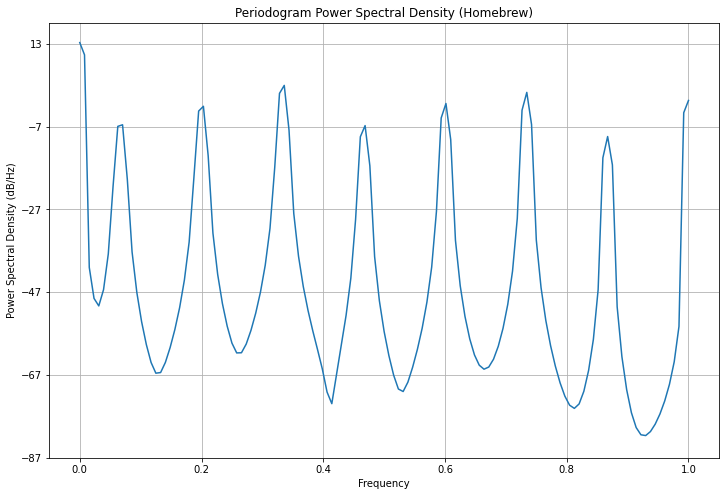

In [4]:
x = lehmer(1000, 1, 13, 31)
plt.figure(figsize=(12, 8))
plt.psd(x)
plt.title('Periodogram Power Spectral Density (Homebrew)')
plt.show()

The PSD is very different from the numpy random number PSD. Evidently, for "random" numbers this is not a good result. We can show that the series repeats by plotting the first 30 samples against the second 30 samples...

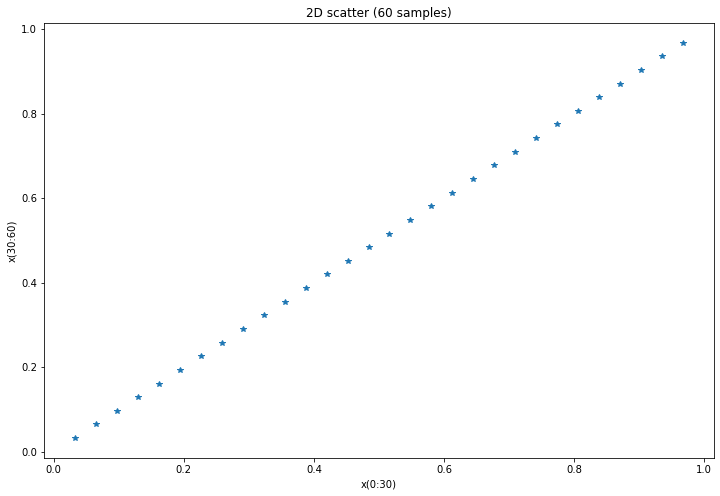

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(x[0:30], x[30:60], '*')
plt.title('2D scatter (60 samples)')
plt.xlabel('x(0:30)')
plt.ylabel('x(30:60)')
plt.show()

Or the first 500 against the second 500 samples ..

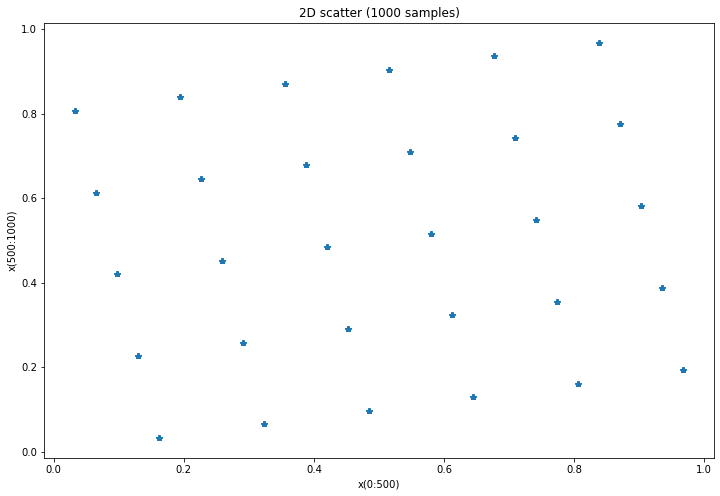

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(x[0:500], x[500:1000], '*')
plt.title('2D scatter (1000 samples)')
plt.xlabel('x(0:500)')
plt.ylabel('x(500:1000)')
plt.show()

We can do somewhat better with our home brew function when we select better start values, let use $a=7^5$ (From Legacy Matlab)

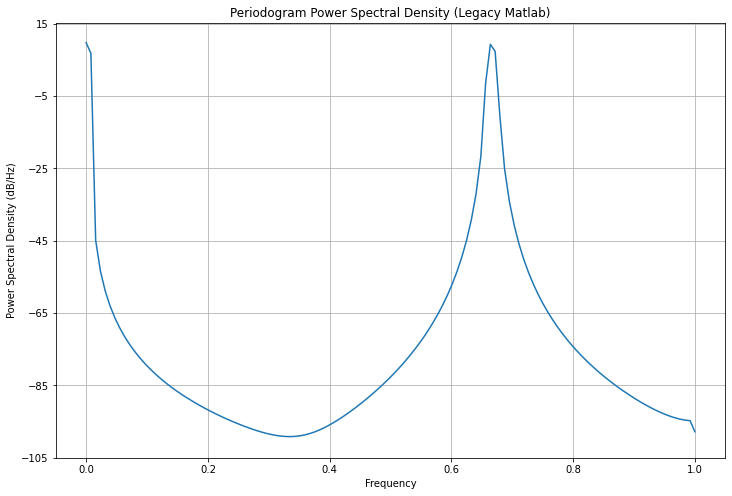

In [7]:
x = lehmer(1000, 1, 7**5, 31)
plt.figure(figsize=(12, 8))
plt.psd(x)
plt.title('Periodogram Power Spectral Density (Legacy Matlab)')
plt.show()

It just shows that it is not easy to generate good pseudo random numbers. Best is to leave this to the professionals, a.k.a. numpy